In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [2]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/ibm project/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4345 images belonging to 5 classes.


In [3]:
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/ibm project/flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4345 images belonging to 5 classes.


In [4]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [6]:
model=Sequential()

In [7]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [9]:
model.add(Dense(5,activation='softmax'))
len(x_train)

182

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [12]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
182/182 [==============================] - 67s 370ms/step - loss: 0.7340 - accuracy: 0.7162 - val_loss: 0.7671 - val_accuracy: 0.6951
Epoch 2/10
182/182 [==============================] - 83s 457ms/step - loss: 0.7310 - accuracy: 0.7206 - val_loss: 0.7854 - val_accuracy: 0.7054
Epoch 3/10
182/182 [==============================] - 64s 349ms/step - loss: 0.7088 - accuracy: 0.7217 - val_loss: 0.6324 - val_accuracy: 0.7551
Epoch 4/10
182/182 [==============================] - 83s 458ms/step - loss: 0.6630 - accuracy: 0.7455 - val_loss: 0.5733 - val_accuracy: 0.7793
Epoch 5/10
182/182 [==============================] - 65s 357ms/step - loss: 0.6648 - accuracy: 0.7475 - val_loss: 0.7620 - val_accuracy: 0.7072
Epoch 6/10
182/182 [==============================] - 63s 349ms/step - loss: 0.6635 - accuracy: 0.7487 - val_loss: 0.6709 - val_accuracy: 0.7457
Epoch 7/10
182/182 [==============================] - 66s 361ms/step - loss: 0.6234 - accuracy: 0.7643 - val_loss: 0.5516 - val_ac

In [26]:
model.save('ibm projects_flowers.h5')



In [27]:
pwd

'/content'

In [28]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [30]:
model=load_model('IBM_flowers.h5')

In [34]:
img=image.load_img('/content/drive/MyDrive/ibm project/flowers/rose/145862135_ab710de93c_n.jpg')


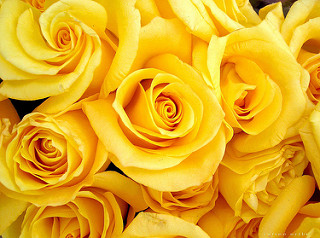

In [35]:
img

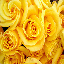

In [37]:
img=image.load_img('/content/drive/MyDrive/ibm project/flowers/rose/145862135_ab710de93c_n.jpg',target_size=(64,64))
img


In [38]:
x=image.img_to_array(img)
x

array([[[216., 189.,  40.],
        [230., 208.,  89.],
        [228., 209.,  80.],
        ...,
        [237., 226., 144.],
        [226., 205., 100.],
        [224., 185.,  48.]],

       [[229., 209.,  74.],
        [224., 214.,  93.],
        [231., 214.,  74.],
        ...,
        [240., 218., 117.],
        [240., 219., 104.],
        [223., 185.,  14.]],

       [[229., 210.,  82.],
        [227., 215.,  97.],
        [235., 214.,  69.],
        ...,
        [243., 224., 119.],
        [231., 185.,  12.],
        [216., 172.,   1.]],

       ...,

       [[205., 167.,  20.],
        [184., 147.,   4.],
        [165., 123.,   3.],
        ...,
        [205., 155.,   4.],
        [210., 172.,  25.],
        [215., 166.,  11.]],

       [[193., 164.,  10.],
        [182., 153.,   0.],
        [164., 129.,   3.],
        ...,
        [211., 136.,   8.],
        [228., 182.,  37.],
        [203., 158.,   0.]],

       [[191., 163.,  79.],
        [191., 158.,  27.],
        [172., 1

In [40]:
x=np.expand_dims(x,axis=0)
x

array([[[[216., 189.,  40.],
         [230., 208.,  89.],
         [228., 209.,  80.],
         ...,
         [237., 226., 144.],
         [226., 205., 100.],
         [224., 185.,  48.]],

        [[229., 209.,  74.],
         [224., 214.,  93.],
         [231., 214.,  74.],
         ...,
         [240., 218., 117.],
         [240., 219., 104.],
         [223., 185.,  14.]],

        [[229., 210.,  82.],
         [227., 215.,  97.],
         [235., 214.,  69.],
         ...,
         [243., 224., 119.],
         [231., 185.,  12.],
         [216., 172.,   1.]],

        ...,

        [[205., 167.,  20.],
         [184., 147.,   4.],
         [165., 123.,   3.],
         ...,
         [205., 155.,   4.],
         [210., 172.,  25.],
         [215., 166.,  11.]],

        [[193., 164.,  10.],
         [182., 153.,   0.],
         [164., 129.,   3.],
         ...,
         [211., 136.,   8.],
         [228., 182.,  37.],
         [203., 158.,   0.]],

        [[191., 163.,  79.],
       

In [42]:
y=np.argmax(model.predict(x),axis=1)
y

array([3])

In [43]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [44]:
index=['daisy','dandelion','rose','sunflower','tulip']


In [45]:
index[y[0]]

'sunflower'